In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\esgib\Desktop\Alina\Course 4\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'Orders_products_all.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### 6. Create an appropriate visualization to show the distribution of profiles

### 7. Agregate min, mean and min variables on a customer profile level for usage frequency and expenditure

### 8. Compare your customer profiles with regions and departments.

### 9. Produce suitable charts to illistrate the results

### Age categories:
Age cathegories:
- age <= 30 Young customer
- age (30 - 55] Mature customer
- age > 55 Eledry customer

In [4]:
#assigning age category to each user
df.loc[df['age'] <= 30, 'age_category'] = 'Young customer'
df.loc[(df['age'] > 30) & (df['age'] <= 55), 'age_category'] = 'Mature customer'
df.loc[df['age'] > 55 , 'age_category'] = 'Eldery customer'

In [5]:
df['age_category'].value_counts()

Eldery customer    13103551
Mature customer    12724237
Young customer      6605242
Name: age_category, dtype: int64

In [6]:
#gettign an overview over the prefferences in function of age

crosstab_age_prod = pd.crosstab(df['department'], df['age_category'], dropna = False)

In [7]:
crosstab_age_prod

age_category,Eldery customer,Mature customer,Young customer
department,,,
alcohol,60897,60404,32395
babies,167881,168950,86971
bakery,474656,462816,239315
beverages,1093886,1051387,542886
breakfast,284521,279398,145650
bulk,13898,13509,7166
canned goods,430639,417492,219927
dairy eggs,2180161,2129355,1104500
deli,425384,412467,213398


<AxesSubplot:title={'center':'Product consumption by different age categories'}, xlabel='department'>

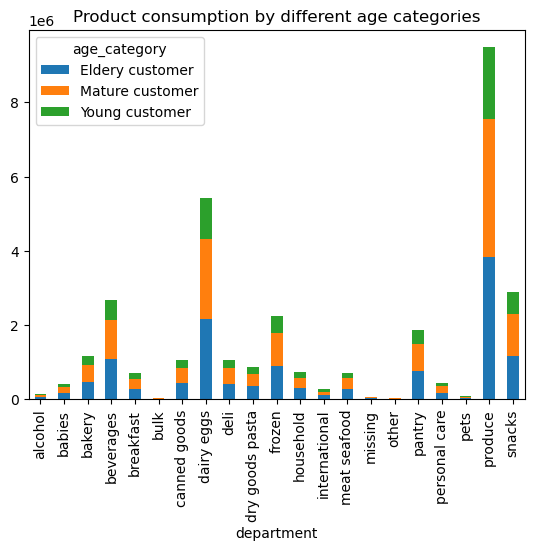

In [8]:
#creating a visualization to show product preferences by age
crosstab_age_prod.plot( kind='bar', stacked=True, title='Product consumption by different age categories')

<AxesSubplot:title={'center':'Distribution of age categories per regions'}, xlabel='region'>

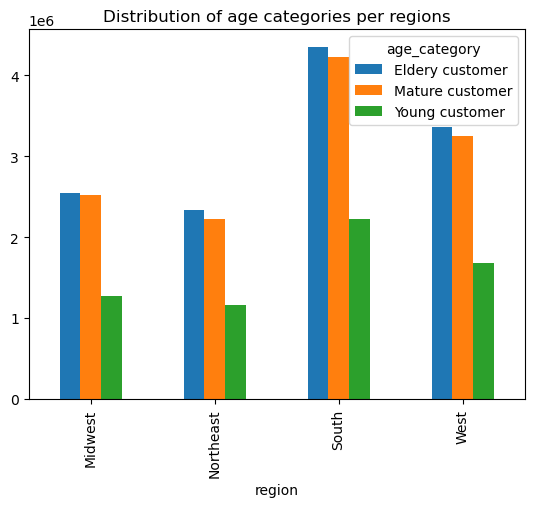

In [9]:
#checking whether there is a difference between regions on what is related to age category
pd.crosstab(df['region'], df['age_category'], dropna = False).plot(kind = 'bar', stacked = False, title = 'Distribution of age categories per regions')

Comment: The age categories are distributed in the same proportion among the states

In [10]:
#Agregating min, mean and max value in function of expenditure
df.groupby('age_category').agg({'prices': ['min', 'mean', 'max']})

prices                    
                   min       mean      max
age_category                              
Eldery customer    1.0  11.966969  99999.0
Mature customer    1.0  11.954917  99999.0
Young customer     1.0  12.060695  99999.0

Comment: In average, young and eldery customers are buying products slightly more expensive

In [22]:
#Aggregating min, mean and max values in function of frequency
df.groupby('age_category').agg({'max_order' : ['min', 'mean', 'max']})

max_order               
                      min       mean max
age_category                            
Eldery customer         3  33.060757  99
Mature customer         3  33.144990  99
Young customer          3  32.856996  99

Comment: There is no significant difference related to order frequency between different age categories. The young customers have in average slightly smaller number of orders

### Income
Income categories:
- income < 40000 Low budget
- income 40000 - 100000 Middle budget
- income 100000 - 250000 High budget
- income >= 250000 Very high budget

In [11]:
#creating 'income_category' column and assigning income flag
df.loc[df['income'] < 40000, 'income_category'] = 'Low budget'
df.loc[(df['income'] >= 40000) & (df['income'] < 100000), 'income_category'] = 'Middle budget'
df.loc[(df['income'] >= 100000) & (df['income'] < 250000), 'income_category'] = 'High budget'
df.loc[df['income'] >= 250000, 'income_category'] = 'Very hight budget'


In [12]:
df['income_category'].value_counts()


Middle budget        15877284
High budget          14644167
Low budget            1728926
Very hight budget      182653
Name: income_category, dtype: int64

Comment: Most of purchases were done by custtomers with middle and high income.

In [13]:
#creating a view to see the product consumption per income category
crosstab_income_prod = pd.crosstab(df['department'], df['income_category'], dropna = False)

In [14]:
crosstab_income_prod

income_category,High budget,Low budget,Middle budget,Very hight budget
department,,,,
alcohol,68016,9593,71373,4714
babies,200862,13352,208111,1477
bakery,541902,54087,571752,9046
beverages,1156157,202867,1311819,17316
breakfast,308925,49425,346722,4497
bulk,14673,2359,17523,18
canned goods,502783,38849,519619,6807
dairy eggs,2477805,252021,2653048,31142
deli,476928,55209,513924,5188


<AxesSubplot:title={'center':'Product consumption by different income categories'}, xlabel='department'>

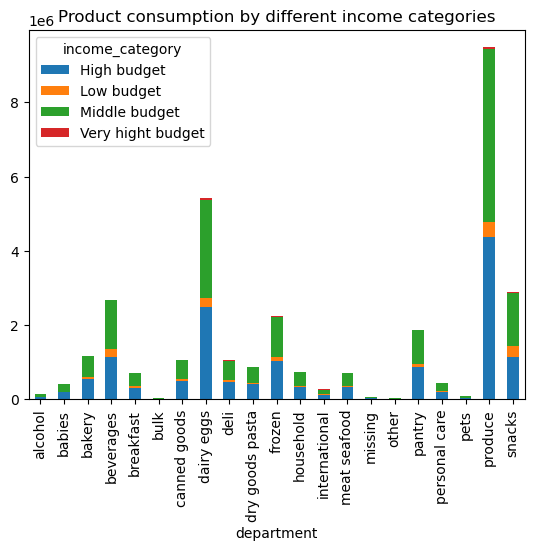

In [15]:
#creating visualization for crosstab_income_prod
crosstab_income_prod.plot( kind='bar', stacked=True, title='Product consumption by different income categories')

Comment: We see that most of the purchases were done by customers with middle and high budget. However there is no visible difference related to prefferences between these two categories.

In [16]:
#Checking wether there is a difference between states in what is related to income category
crosstab_reg_income = pd.crosstab(df['region'], df['income_category'], dropna = False)

In [17]:
crosstab_reg_income

income_category,High budget,Low budget,Middle budget,Very hight budget
region,,,,
Midwest,2908623,339570,3057244,41372
Northeast,2601662,303731,2793529,29222
South,4808138,590921,5340568,61568
West,3741181,432905,4083644,42411


<AxesSubplot:title={'center':'Purchases in different regions by income category'}, xlabel='region'>

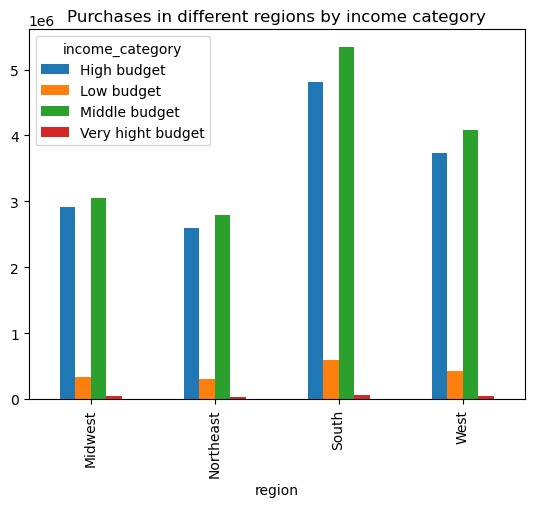

In [18]:
#creating visualization
crosstab_reg_income.plot(kind = 'bar', stacked = False, title = 'Purchases in different regions by income category')

In [151]:
income_age_crosstab = pd.crosstab(df['age_category'], df['income_category'], dropna = False)

In [152]:
income_age_crosstab

income_category,High budget,Low budget,Middle budget,Very hight budget
age_category,,,,
Eldery customer,9055810,556987,3402162,88592
Mature customer,5400731,693118,6552858,77530
Young customer,187626,478821,5922264,16531


<AxesSubplot:title={'center':'Distribution of income category in function of age'}, xlabel='age_category'>

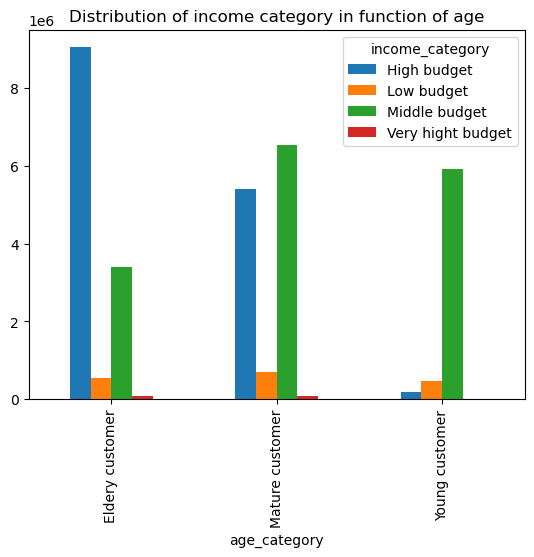

In [156]:
income_age_crosstab.plot.bar(title = 'Distribution of income category in function of age')

Comment: There is no markable difference between the states in what is related to purchaises done by different income cathegories. In all states most of purchaises were done by people with high and midle income categories followd by low and very high.

In [23]:
#Agregating min, mean and max value in function of expenditure
df.groupby('income_category').agg({'prices' : ['min', 'mean', 'max']})

prices                     
                     min        mean      max
income_category                              
High budget          1.0   13.554148  99999.0
Low budget           1.0    6.501095     25.0
Middle budget        1.0    8.286582  99999.0
Very hight budget    1.0  258.924114  99999.0

Comment: the price average of the products bought by different income categories grows from low budget to very high budget category.

In [24]:
#Agregating min, mean and max value in function of expenditure
df.groupby('income_category').agg({'max_order' : ['min', 'mean', 'max']})

max_order               
                        min       mean max
income_category                           
High budget               3  33.240690  99
Low budget                3  30.129281  99
Middle budget             3  33.134013  99
Very hight budget         3  38.514555  99

Customers from very high budget category are ordering in average 8 products more than customers from low budget category. Customers from middle and high budget category have aproximately same average amount of orders

### Checking segmentation by gender

In [15]:
df['gender'].value_counts()

Male      16329069
Female    16103961
Name: gender, dtype: int64

There is no remarkable difference in between nr of male and female customers

In [16]:
#cecking wheter there is a differens in product preferences in function of gender
crosstab_gender_prod = pd.crosstab(df['department'], df['gender'], dropna = False)

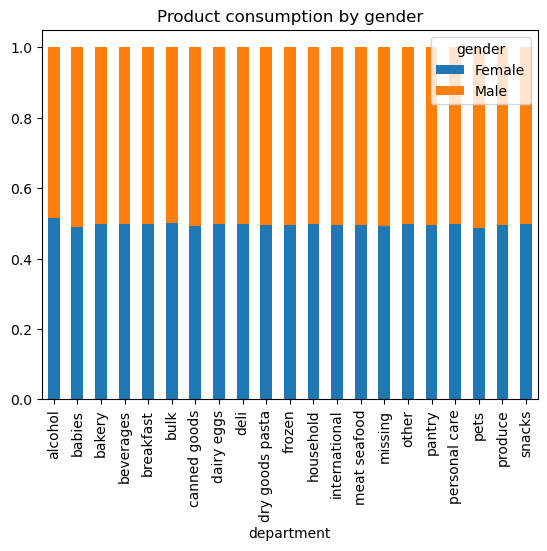

In [157]:
#creatign a chart to visualize the results
#df.groupby('department')['region'].value_counts(normalize=True).unstack('region').plot.bar(stacked=True, title = 'Are there any preferences in function of region').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'dep_region.png'))
df.groupby('department')['gender'].value_counts(normalize=True).unstack('gender').plot.bar(stacked=True, title='Product consumption by gender').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'dep_gen.png'))

In [25]:
#agregating min, mean and max values for gender categories
df.groupby('gender').agg({'max_order' : ['min', 'mean', 'max']})

max_order               
             min       mean max
gender                         
Female         3  33.206882  99
Male           3  32.899862  99

Comment: Female customers tend to create  about 1% more orders than male customers

In [27]:
#agregating min, mean and max values for gender categories
df.groupby('gender').agg({'prices' : ['min', 'mean', 'max']})

prices                    
          min       mean      max
gender                           
Female    1.0  11.893261  99999.0
Male      1.0  12.068183  99999.0

Comment: In average, male customers tend to buy slightly more expensive products

### Checking vegetarian customers

In [24]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,...,income,region,spend_mean,spend_flag,total_orders,max_order,activity_flag,department,age_category,income_category
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,98119,West,8.618889,Low spender,145532043.0,8,High_activity,dairy eggs,Eldery customer,Middle budget
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,...,98119,West,8.618889,Low spender,145532043.0,8,High_activity,produce,Eldery customer,Middle budget
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,...,98119,West,8.618889,Low spender,145532043.0,8,High_activity,pantry,Eldery customer,Middle budget
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,...,98119,West,8.618889,Low spender,145532043.0,8,High_activity,pantry,Eldery customer,Middle budget
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,...,98119,West,8.618889,Low spender,145532043.0,8,High_activity,pantry,Eldery customer,Middle budget


In [25]:
df['department'].unique()

array(['dairy eggs', 'produce', 'pantry', 'meat seafood', 'bakery',
       'personal care', 'snacks', 'breakfast', 'beverages', 'deli',
       'household', 'international', 'dry goods pasta', 'frozen',
       'canned goods', 'babies', 'pets', 'alcohol', 'bulk', 'missing',
       'other'], dtype=object)

In [31]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'department_id', 'prices',
       'gender', 'state', 'age', 'nr_dependants', 'fam_status', 'income',
       'region', 'spend_mean', 'spend_flag', 'total_orders', 'max_order',
       'activity_flag', 'department', 'age_category', 'income_category'],
      dtype='object')

In [30]:
#create a flag for orders which have meat in it
df.loc[df['department'] == 'meat seafood', 'not_veg_flag'] = 1
df.loc[df['department'] != 'meat seafood', 'not_veg_flag'] = 0


In [33]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,...,region,spend_mean,spend_flag,total_orders,max_order,activity_flag,department,age_category,income_category,not_veg_flag
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,West,8.618889,Low spender,145532043.0,8,High_activity,dairy eggs,Eldery customer,Middle budget,0.0
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,...,West,8.618889,Low spender,145532043.0,8,High_activity,produce,Eldery customer,Middle budget,0.0
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,...,West,8.618889,Low spender,145532043.0,8,High_activity,pantry,Eldery customer,Middle budget,0.0
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,...,West,8.618889,Low spender,145532043.0,8,High_activity,pantry,Eldery customer,Middle budget,0.0
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,...,West,8.618889,Low spender,145532043.0,8,High_activity,pantry,Eldery customer,Middle budget,0.0


In [31]:
#grouping users in function of 'not_veg_flag' and creating a column 'veg' to show the results. If a user ever ordered meath, the sum will be > 0
df['veg'] = df.groupby('user_id')['not_veg_flag'].sum()

In [32]:
#assigning meat_preference flag to qualify users in meat_lovers and vegetarians
df.loc[df['veg']>0 , 'meat_preference'] = 'meat lover'
df.loc[df['veg']<1, 'meat_preference'] = 'vegetarian'

In [33]:
df['meat_preference'].value_counts()

meat lover    113891
vegetarian     92318
Name: meat_preference, dtype: int64

In [34]:
#the columns we created to identify vegetarian users are not needed anymore, so I drop them.
df.drop(columns = ['not_veg_flag', 'veg'], inplace = True)

In [35]:
#checking whether there is a defference between income categories in what is relaed to meat prefference
crosstab_income_meat_pref = pd.crosstab(df['income_category'], df['meat_preference'], dropna = False)

<AxesSubplot:title={'center':'Meat preferences by income category'}, xlabel='income_category'>

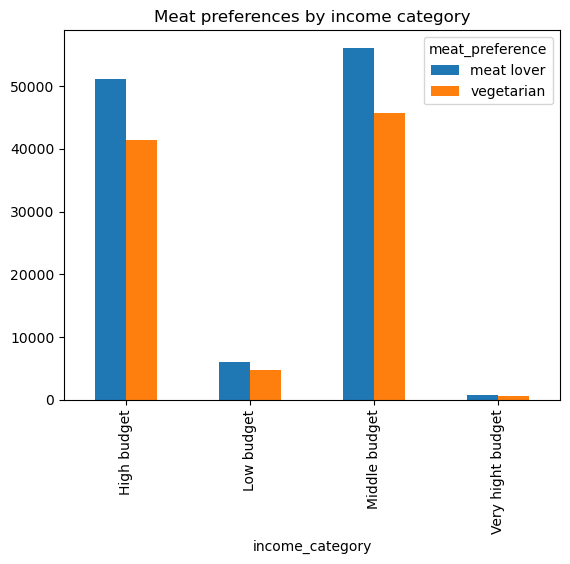

In [37]:
#creating a visualization to better see the results
crosstab_income_meat_pref.plot(kind = 'bar', stacked = False, title = 'Meat preferences by income category')

Comment: We can't see any difference related to meat prefferences in function of income coategory. In all income categories there are slightly more orders done by "meat lovers" than by "vegetarian"

In [39]:
#agregating min, mean and max values fo gender categories
df.groupby('meat_preference').agg({'max_order' : ['min', 'mean', 'max']})

max_order               
                      min       mean max
meat_preference                         
meat lover              3  33.514202  99
vegetarian              3  33.635954  99

Comment: there almost no difference between vegetarian and and not vegetarian customers in what is related to number of created orders.

In [40]:
#agregating min, mean and max values fo gender categories
df.groupby('meat_preference').agg({'prices' : ['min', 'mean', 'max']})

prices                    
                   min       mean      max
meat_preference                           
meat lover         1.0  10.615703  99999.0
vegetarian         1.0  15.319087  99999.0

Comment: Vegetarian customers tend to buy in average more expensive products.

### Profiling young parents

In [42]:
#create a flag for orders which have babies productsin it and belong to young customer category
df.loc[(df['department'] == 'babies') & (df['age_category'] == 'Young customer'), 'young_parents'] = 1

In [43]:
#assigning a flag to every other customer which is not flagged as young parent
df.loc[df['young_parents'] != 1.0, ['young_parents']] = 0

In [44]:
#grouping the users which are qualified as young parents
df['y_p'] = df.groupby('user_id')['young_parents'].sum()

In [45]:
df['y_p'].value_counts()

0.0      199345
1.0        1818
2.0         903
3.0         537
4.0         453
          ...  
126.0         1
259.0         1
292.0         1
95.0          1
233.0         1
Name: y_p, Length: 174, dtype: int64

In [46]:
#assigning young parent flag to users
df.loc[df['y_p'] > 0, 'young_parent'] = 'young_parent'
df.loc[df['y_p'] < 1, 'young_parent'] = 'not a young parent'

In [47]:
df['young_parent'].value_counts()

not a young parent    199345
young_parent            6864
Name: young_parent, dtype: int64

In [48]:
#dropping columns which we don't need anymore
df.drop(columns = ['young_parents', 'y_p'], inplace = True)

<AxesSubplot:title={'center':'Young parents per state'}, xlabel='region'>

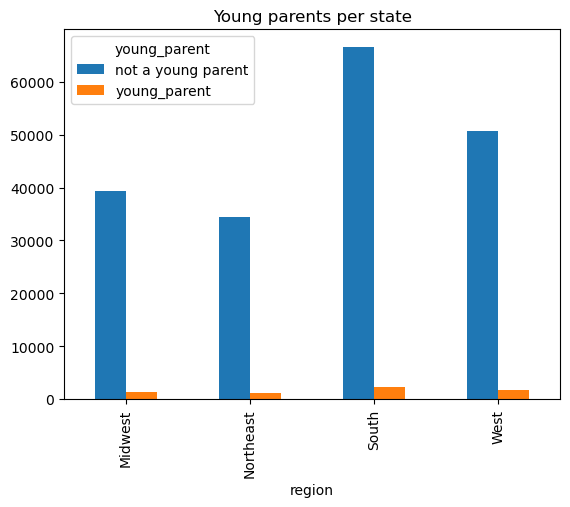

In [49]:
pd.crosstab(df['region'], df['young_parent'], dropna = False).plot(kind = 'bar', stacked = False, title = 'Young parents per state')

Comment: There is no difference between the states in what is related percentage of young parents.

<AxesSubplot:title={'center':'Products preferences'}, xlabel='department'>

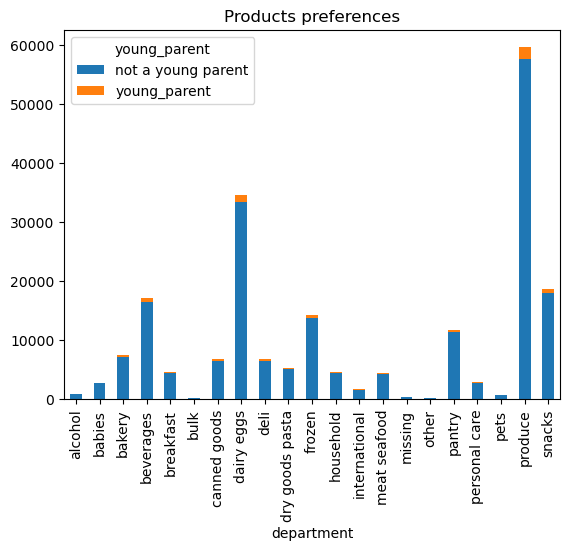

In [50]:
pd.crosstab(df['department'], df['young_parent'], dropna = False).plot(kind = 'bar', stacked = True, title = 'Products preferences')

Comment: There is no difference in what is related to percentage of purchases done by young perents in function of department. Seriously?! I would expect that it least by'babies' department it would make difference. :)

In [51]:
#agregating min, mean and max values for young parent categories
df.groupby('young_parent').agg({'max_order' : ['min', 'mean', 'max']})

max_order               
                         min       mean max
young_parent                               
not a young parent         3  33.579934  99
young_parent               3  33.242716  99

In [52]:
#agregating min, mean and max values for young parent categories
df.groupby('young_parent').agg({'prices' : ['min', 'mean', 'max']})

prices                    
                      min       mean      max
young_parent                                 
not a young parent    1.0  12.815396  99999.0
young_parent          1.0   9.990589  14900.0

Comment: There is no visible difference what is related to amount of created orders between young parents and other customers but young parents tend to spend in average les money per product.

In [54]:
df.shape

(32433030, 29)

In [55]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final.pkl'))

## Answering other key questions

1) The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

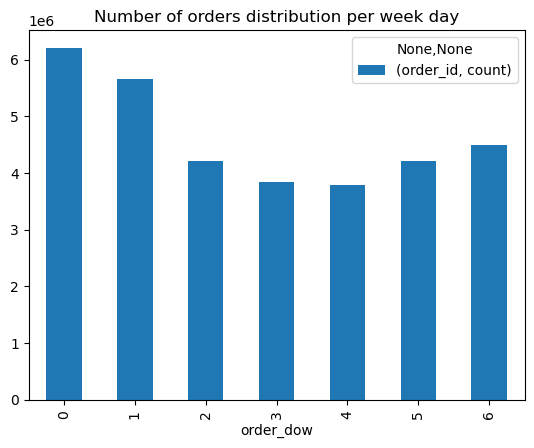

In [62]:
#df.groupby('age_category').agg({'max_order' : ['min', 'mean', 'max']})
df.groupby('order_dow').agg({'order_id' : ['count']}).plot(kind = 'bar', title = 'Number of orders distribution per week day').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_dow.png'))

2)They also want to know whether there are particular times of the day when people spend
the most money, as this might inform the type of products they advertise at these times.

In [63]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'department_id', 'prices',
       'gender', 'state', 'age', 'nr_dependants', 'fam_status', 'income',
       'region', 'spend_mean', 'spend_flag', 'total_orders', 'max_order',
       'activity_flag', 'department', 'age_category', 'income_category',
       'meat_preference', 'young_parent'],
      dtype='object')

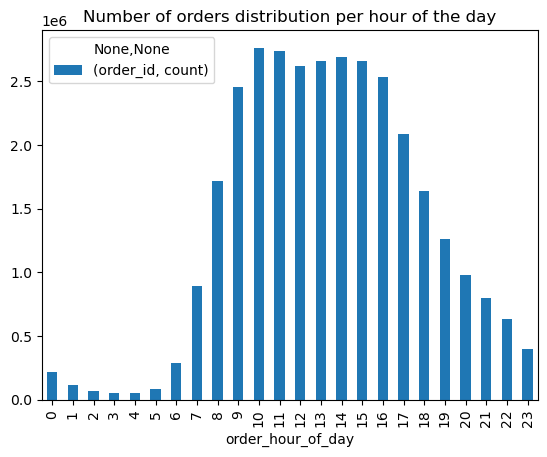

In [64]:
#creating visualisation for order_id count groupped by order_hour_of_day
df.groupby('order_hour_of_day').agg({'order_id' : ['count']}).plot(kind = 'bar', title = 'Number of orders distribution per hour of the day').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_hour_of_the_day.png'))

3) Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Price ranges:
price < 5 ==> low price product
price between 5 and 40 ==> middle price product
price > 40  ==> hihg price product

In [65]:
#assigning the price range flag
df.loc[df['prices'] < 5, 'product_price_range'] = 'Low price'

In [66]:
df.loc[(df['prices']>= 5) & (df['prices'] < 40), 'product_price_range'] = 'Middle Price'

In [67]:
df.loc[df['prices'] >=40, 'product_price_range'] = 'High price'

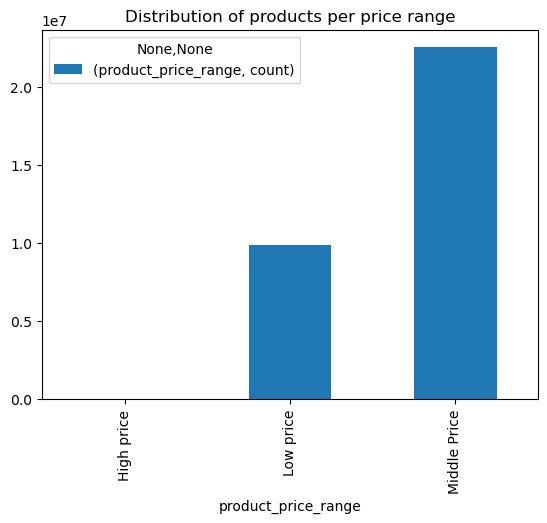

In [75]:
df.groupby('product_price_range').agg({'product_price_range' : ['count']}).plot(kind = 'bar',  title = 'Distribution of products per price range').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'product_range.png'))


4) Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

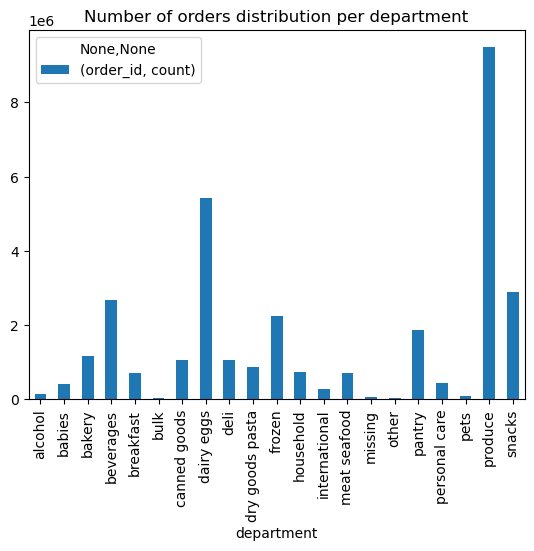

In [76]:
df.groupby('department').agg({'order_id' : ['count']}).plot(kind = 'bar', title = 'Number of orders distribution per department').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'bar_orders_department.png'))

5) The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:

    a) What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
    
    b) Are there differences in ordering habits based on a customer’s loyalty status?
    
    c) Are there differences in ordering habits based on a customer’s region?
    d) Is there a connection between age and family status in terms of ordering habits?
    e) What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?
    f) What differences can you find in ordering habits of different customer profiles?
Consider the price of orders, the frequency of orders, the products customers are
ordering, and anything else you can think of.

In [78]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'department_id', 'prices',
       'gender', 'state', 'age', 'nr_dependants', 'fam_status', 'income',
       'region', 'spend_mean', 'spend_flag', 'total_orders', 'max_order',
       'activity_flag', 'department', 'age_category', 'income_category',
       'meat_preference', 'young_parent', 'product_price_range'],
      dtype='object')

5.a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

<AxesSubplot:title={'center':'5.a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?'}, ylabel='Frequency'>

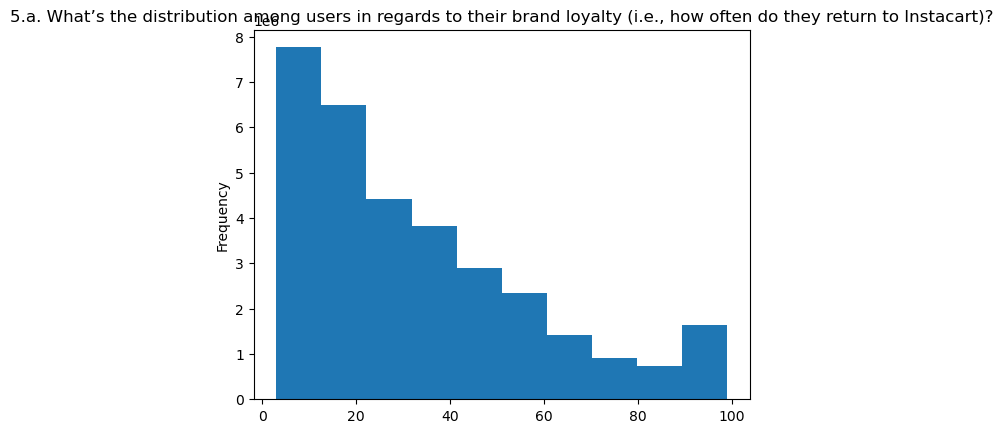

In [108]:

df['max_order'].plot.hist(bins = 10, title = '5.a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?')


5.b. Are there differences in ordering habits based on a customer’s loyalty status?

In [111]:
df.loc[df['max_order'] < 20, 'loyalty_flag'] = 'low loyalty'
df.loc[(df['max_order'] >= 20) & (df['max_order']< 50), 'loyalty_flag'] = 'loyal'
df.loc[df['max_order'] >= 50, 'loyalty_flag'] = 'hig loyalty'

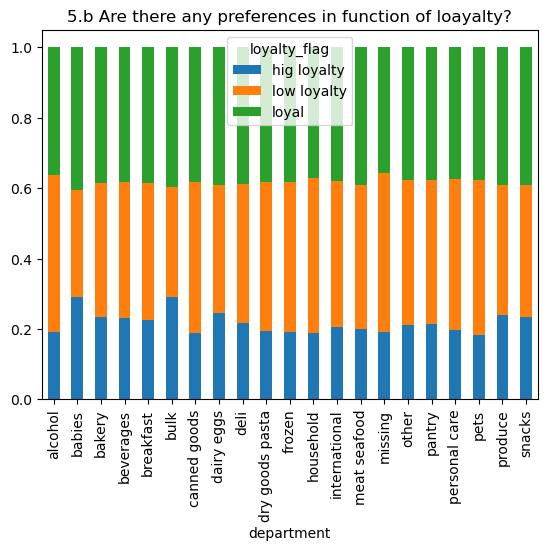

In [129]:
df.groupby('department')['loyalty_flag'].value_counts(normalize=True).unstack('loyalty_flag').plot(kind = 'bar', stacked = True, title = '5.b Are there any preferences in function of loayalty?').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'dep_loyalty.png'))

5.c. Are there differences in ordering habits based on a customer’s region?

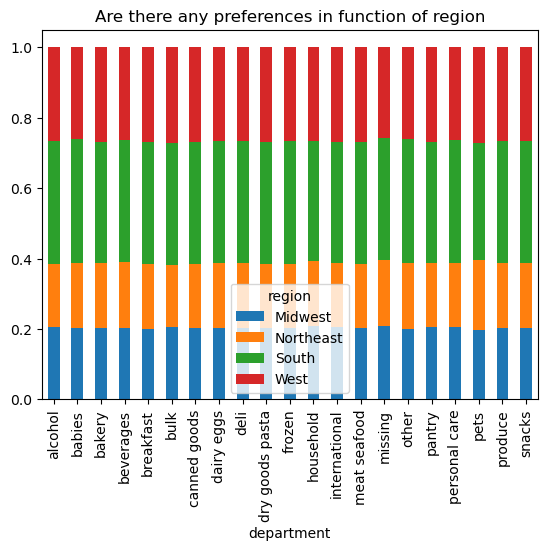

In [126]:
df.groupby('department')['region'].value_counts(normalize=True).unstack('region').plot.bar(stacked=True, title = 'Are there any preferences in function of region').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'dep_region.png'))

5.d. Is there a connection between age and family status in terms of ordering habits?

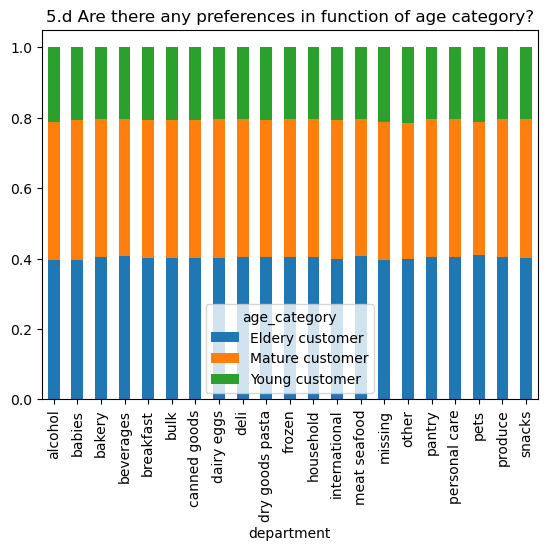

In [148]:
#ordering habits in function of age categories
df.groupby('department')['age_category'].value_counts(normalize=True).unstack('age_category').plot(kind = 'bar', stacked = True, title = '5.d Are there any preferences in function of age category?').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'dep_age_cat.png'))

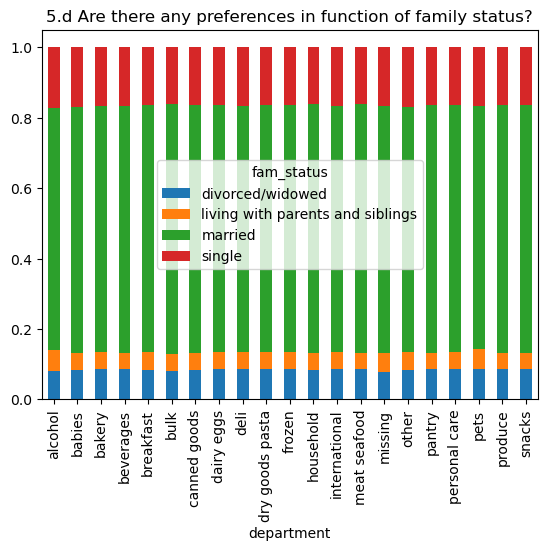

In [149]:
#ordering habits in function of age categories
df.groupby('department')['fam_status'].value_counts(normalize=True).unstack('fam_status').plot(kind = 'bar', stacked = True, title = '5.d Are there any preferences in function of family status?').figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'dep_fam_stat.png'))

In [158]:
df.shape

(32433030, 31)

In [159]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'department_id', 'prices',
       'gender', 'state', 'age', 'nr_dependants', 'fam_status', 'income',
       'region', 'spend_mean', 'spend_flag', 'total_orders', 'max_order',
       'activity_flag', 'department', 'age_category', 'income_category',
       'meat_preference', 'young_parent', 'product_price_range',
       'loyalty_flag'],
      dtype='object')